In [5]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
import gc
import matplotlib.pyplot as plt


ЗЧИТУВАННЯ ФАЙЛУ

In [6]:
file_path = 'Козіна Інна Олексіївна_diploma.xlsx'

if __name__ == '__main__':

    workbook = load_workbook(filename=file_path, read_only=True)
    sheet = workbook['in']
    row_count = sheet.max_row

    print(f'Файл містить: {row_count} рядків')
    
    # Список для зберігання рядків
    rows = []

    # Ітерування по рядках аркуша
    for row in sheet.iter_rows(values_only=True):  
        rows.append(row)
    
    print(f'Було зчитано {len(rows)} рядків')

Файл містить: 221483 рядків
Було зчитано 221483 рядків


СТВОРЮЄМО DATA FRAME

In [7]:
df = pd.DataFrame(rows[1:], columns=rows[0])

del rows
gc.collect()

22

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221482 entries, 0 to 221481
Data columns (total 54 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   None                                                     221482 non-null  int64  
 1   id                                                       221482 non-null  int64  
 2   NoCredHist_currencyid_opened_cnt_6m                      221482 non-null  int64  
 3   NoCredHist_max_openamount_other_active_3m                221482 non-null  int64  
 4   NoCredHist_min_duration_other_ever                       221482 non-null  int64  
 5   NoCredHist_ds_min_count_withdrawal_UAH_6m                221482 non-null  int64  
 6   CredHist_Sum_dpd_month_qty_3m                            221482 non-null  int64  
 7   BureauPac_Ñnt_credits_type_N_3y                         221482 non-null  int64  
 8   ApplHist_ratio

In [9]:
df.describe()

,None,id,NoCredHist_currencyid_opened_cnt_6m,NoCredHist_max_openamount_other_active_3m,NoCredHist_min_duration_other_ever,NoCredHist_ds_min_count_withdrawal_UAH_6m,CredHist_Sum_dpd_month_qty_3m,BureauPac_Ñnt_credits_type_N_3y,ApplHist_ratio_appr_to_all_sum_amountbegin_PIL_CSF_ever,ApplHist_avg_amountbegin_appr_CC_6mnth,...,CredHist_Min_days_from_date_close_CSF,NoCredHist_ds_max_count_accurals_1m,BureauPac_avg_credit_term_N,NoCredHist_ds_max_count_days_balance_more_0_Foreign_1m,CredHist_count_PIL_loans_close_1m,NoCredHist_ds_min_count_withdrawal_Foreign_6m,ApplHist_ratio_approved_to_allappl_CSF_6mnth,NoCredHist_max_openamount_depo_y_opened_1m,deal_target,amountbegingroup
count,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,...,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.000000,221482.0,221482.000000,221482.000000
mean,110740.500000,108058.759272,0.107377,-723.452032,-848.192309,-590.834406,-244.630349,0.004104,-322.959079,441.898439,...,-2.774271,-613.140038,-928.828577,-612.921533,0.024611,-591.578873,-146.106562,-999.0,0.022042,0.056641
std,63936.490498,62430.496520,0.386039,446.570967,541.655483,492.361502,429.650051,0.112583,467.850165,4786.014529,...,1224.519284,486.700085,363.124783,486.992311,0.166241,491.433636,353.042920,0.0,0.146822,0.386565
min,0.000000,1.000000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,-999.000000,-999.0,0.000000,0.000000
25%,55370.250000,53992.250000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,-999.000000,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000,-999.0,0.000000,0.000000
50%,110740.500000,108061.500000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000000,0.719625,0.000000,...,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,-999.000000,0.000000,-999.0,0.000000,0.000000
75%,166110.750000,162033.750000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,764.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,-999.0,0.000000,0.000000
max,221481.000000,216337.000000,3.000000,2500.000000,4565.000000,162.000000,7.000000,13.000000,1.000000,150000.000000,...,4680.000000,42.000000,4705.000000,93.000000,4.000000,146.000000,1.000000,-999.0,1.000000,3.000000


АНАЛІЗ

In [10]:
# Перевіряємо чи всі id унікальні або ж зустрічаються дублікати

unique_count = df['id'].nunique()
print(f'Загальна кількість {row_count}, але унікальних записів {unique_count}')

Загальна кількість 221483, але унікальних записів 213438


In [11]:
# Після виконання коду вище, що в файлі є неунікальні записи
 
result = df.groupby('id')['deal_target'].nunique()

# Перевіряю к-сть унікальних значень deal_target для кожного id
# Чи є більше ніж 1  значення для кожного id
result_ids = result[result > 1].index

if len(result_ids) > 0:
    print("Є відмінні deal_target для id:", result_ids.tolist())
else:
    print("Для всіх id значення deal_target однакові.")

Для всіх id значення deal_target однакові.


In [12]:
# Групуємо та перевіряємо дані на валідність

valid_data = [0, 1]

grouped_df =  df.groupby('deal_target')
 
print(f'Створено {grouped_df.ngroups} групи')

# Порівнюємо ключі груп з валідними даними

group_keys = set(grouped_df.groups.keys())
valid_keys = set(valid_data)

# Перевірка на входження
if group_keys.issubset(valid_keys):
    print("Все ок: всі ключі груп у valid_data.")
else:
    print("Помилка: є ключі груп, яких немає у valid_data.")



Створено 2 групи
Все ок: всі ключі груп у valid_data.


In [13]:
#Створюємо нові data frame з кожної групи та видаляємо дублікати по id
group_sizes = grouped_df.size()

print(f'Кількість елементів в групі deal_target = 0: {group_sizes[valid_data[0]]}')
print(f'Кількість елементів в групі deal_target = 1: {group_sizes[valid_data[1]]}')

#Видаляємо дублікати
unique_df_dt0 = grouped_df.get_group(valid_data[0]).drop_duplicates(subset='id',  keep='first')
unique_df_dt1 = grouped_df.get_group(valid_data[1]).drop_duplicates(subset='id',  keep='first')

print(f'Кількість елементів в групі deal_target = 0 після видалення дублікатів: {unique_df_dt0.shape[0]}')
print(f'Кількість елементів в групі deal_target = 1 після видалення дублікатів: {unique_df_dt1.shape[0]}')





Кількість елементів в групі deal_target = 0: 216600
Кількість елементів в групі deal_target = 1: 4882
Кількість елементів в групі deal_target = 0 після видалення дублікатів: 208905
Кількість елементів в групі deal_target = 1 після видалення дублікатів: 4533


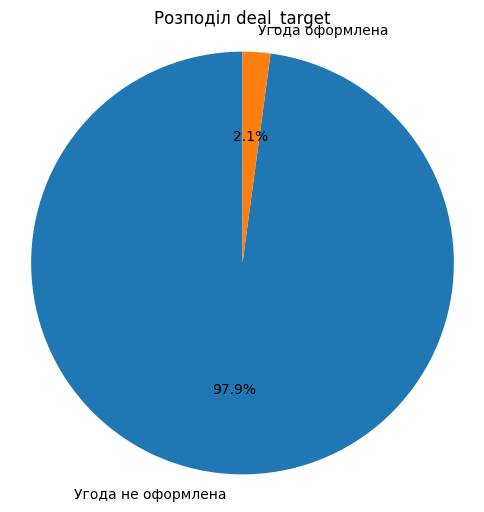

In [14]:
#Малюємо кругову діагрму співвідношення к-сті клієнтів, які впродовж 14 днів оформили договір і, які ні

counts = [unique_df_dt0.shape[0], unique_df_dt1.shape[0]]
labels = ['Угода не оформлена', 'Угода оформлена']

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Розподіл deal_target')
plt.axis('equal') 
plt.show()

                     Кількість угод
Була прострочка                 458
Без прострочки                 4075
Загальна к-сть угод            4533


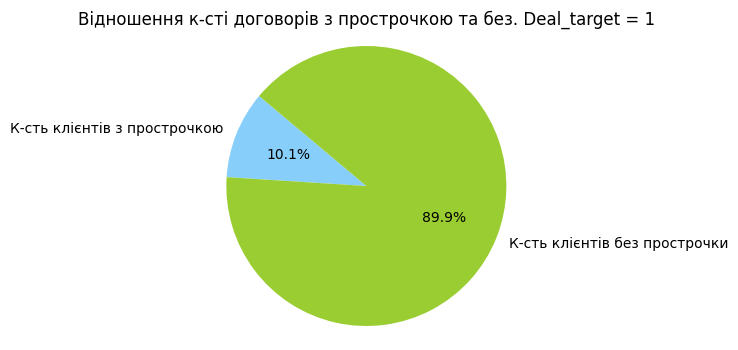

In [15]:
#рахуємо к-сть клієнтів, у яких була прострочка за останні 3 місяці та будуємо кругову діаграму 
# відношення к-сті клієнтів, які своєчасно погашали і к-сті, у яких був хоч 1 прострочений платіж

number_of_overdue_payments = len(unique_df_dt1[unique_df_dt1['CredHist_Sum_dpd_month_qty_3m'] >= 1]) #кількість клієнтів, у яких була прострочка
number_of_timely_payments = unique_df_dt1.shape[0] - number_of_overdue_payments

temp_df = pd.DataFrame([number_of_overdue_payments, number_of_timely_payments], columns=['Кількість угод'], index=['Була прострочка', 'Без прострочки'])
temp_df.loc['Загальна к-сть угод'] = temp_df['Кількість угод'].sum()
print(temp_df)

# Дані для діаграми
labels = ['К-сть клієнтів з прострочкою', 'К-сть клієнтів без прострочки']
sizes = [number_of_overdue_payments, number_of_timely_payments]  
colors = ['lightskyblue', 'yellowgreen'] 

# Створення кругової діаграми
plt.figure(figsize=(6, 4))  
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)


plt.axis('equal') 
plt.title('Відношення к-сті договорів з прострочкою та без. Deal_target = 1')
plt.show()



In [16]:
#Визначаємо клієнтів для data frame з deal_target = 0, які мають к-сть прострочених платежів не більше ніж максимальна к-сть у клієнтів, які оформили кредит

max_number_of_overdue_payments = unique_df_dt1['CredHist_Sum_dpd_month_qty_3m'].max()

# Фільтрація датафрейму за умовою

filtered_df_dt0 = unique_df_dt0.where(unique_df_dt0['CredHist_Sum_dpd_month_qty_3m'] <= max_number_of_overdue_payments).dropna()

count_records_dt0 = filtered_df_dt0.shape[0]

print(f'Кількість клієнтів, які мають допустиму к-сть прострочки {count_records_dt0}')
print(f'Загальна кількість {unique_df_dt0.shape[0]}')


Кількість клієнтів, які мають допустиму к-сть прострочки 208902
Загальна кількість 208905


In [17]:
del filtered_df_dt0
del count_records_dt0

gc.collect()

4175

АНАЛІЗ ПО СУМІ ДОХОДУ З МІСЦЯ РОБОТИ

In [18]:
def remove_unacceptable_values( df, key ):
   return df[df[key].replace(-999, pd.NA).notna()]

Кількість в data frame 1 - 4296, кількість в data frame 0 - 186118


Таблиця к-сті клієнтів та їх суми доходів для укладених угод
      0  1  2   3   4   5   6  7  8
0  4216  1  3  12  19  29  12  2  2


Таблиця к-сті клієнтів та їх суми доходів для неукладених угод
        0   1   2    3    4    5    6    7   8
0  183334  11  98  443  718  901  478  111  24


Загальна таблиця
                      0       500     1000    2000    5000    10000   20000   \
Було оформлено угоду    4216       1       3      12      19      29      12   
Не оформлено угоду    183334      11      98     443     718     901     478   

                      50000   100000  
Було оформлено угоду       2       2  
Не оформлено угоду       111      24  


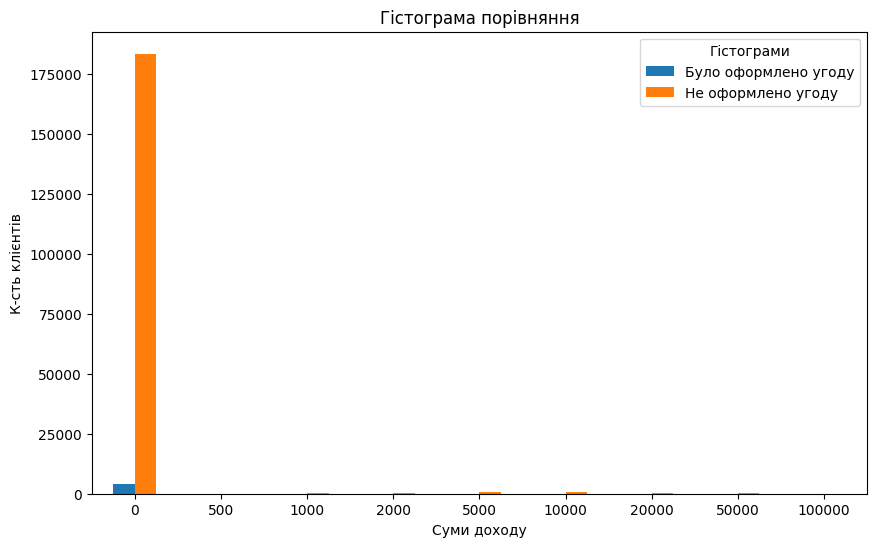

In [19]:
# Прибираємо записи з неприпустимими значеннями -999 по полю дохід від найму
key = 'Appl_Income_from_hiring'
df_cleaned_dt1 = remove_unacceptable_values( unique_df_dt1, key )
df_cleaned_dt0 = remove_unacceptable_values( unique_df_dt0, key )

#К-сть записів в кожного df після видалення рядків з неприпустимими значеннями = -999
print(f'Кількість в data frame 1 - {len(df_cleaned_dt1)}, кількість в data frame 0 - {len(df_cleaned_dt0)}')
print('\n')

max_income = max_income = max(df_cleaned_dt1['Appl_Income_from_hiring'].max(), df_cleaned_dt0['Appl_Income_from_hiring'].max())


bins = [0, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, max_income + 1] #межі ждя розподілу суми доходу

# Обчислення гістограми
hist_dt1, _ = np.histogram(df_cleaned_dt1['Appl_Income_from_hiring'], bins=bins)

temp_df = pd.DataFrame(hist_dt1)
temp_df = temp_df.transpose()
print('Таблиця к-сті клієнтів та їх суми доходів для укладених угод')
print(temp_df)
print('\n')


hist_dt0, _ = np.histogram(df_cleaned_dt0['Appl_Income_from_hiring'], bins=bins)
print('Таблиця к-сті клієнтів та їх суми доходів для неукладених угод')
temp_df0 = pd.DataFrame(hist_dt0)
temp_df0 = temp_df0.transpose()
print(temp_df0)
print('\n')

# Створення DataFrame
print('Загальна таблиця')
df_res = pd.DataFrame([hist_dt1, hist_dt0], columns=bins[:-1], index=['Було оформлено угоду', 'Не оформлено угоду'])

print(df_res)


df_res.T.plot(kind='bar', figsize=(10, 6))

# Додавання заголовків та підписів
plt.title('Гістограма порівняння')
plt.xlabel('Суми доходу')
plt.ylabel('К-сть клієнтів')
plt.xticks(rotation=0)
plt.legend(title='Гістограми')
plt.show()

[ 318   77  100  121  146  156  211  201  172 2056]


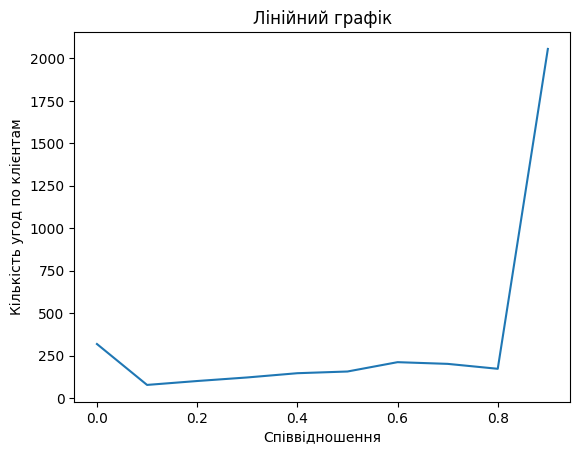

In [20]:
# Можемо побачити на лінійному графіку статистику відношення
#  средней суммы одобренных к средней сумме всех заявок с типом продукта PIL и CSF за все время

key = 'ApplHist_ratio_appr_to_all_sum_amountbegin_PIL_CSF_ever'
unique_df_dt1_amount_appl = remove_unacceptable_values( unique_df_dt1, key )

unique_df_dt0_amount_appl = remove_unacceptable_values( unique_df_dt0, key )

hist_dt1, bins = np.histogram(unique_df_dt1_amount_appl[key], bins=10)
print(hist_dt1)

bins = np.delete(bins, -1)

# Створення графіка
plt.plot(bins, hist_dt1)

plt.title("Лінійний графік")
plt.xlabel("Співвідношення")
plt.ylabel("Кількість угод по клієнтам")

plt.show()


                            Кількість клієнтів
Не має оформленого кредиту                2967
Має і PIL, i CSF                            61
Має тільки СSF                             262
Має тільки PIL                            1243


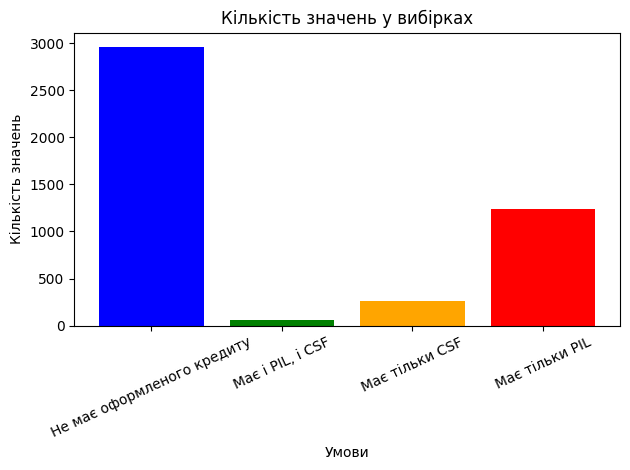

In [21]:
# Перевіряємо скільки клієнтів має PIL, CSF: жодного, обидва, один з

key ='CredHist_count_CSF_loans_open_3m'
key1 = 'CredHist_count_PIL_loans_open_3m'

unique_df_dt1_CSF = remove_unacceptable_values( unique_df_dt1, key )
unique_df_dt1_PIL = remove_unacceptable_values( unique_df_dt1, key1)

# Перетворення в Series

series_СSF = unique_df_dt1_CSF.set_index('id')[key]
series_PIL = unique_df_dt1_PIL.set_index('id')[key1]

# Умови для вибірки
condition_1 = (series_СSF == 0) & (series_PIL == 0)
condition_2 = (series_СSF > 0) & (series_PIL > 0)
condition_3 = (series_СSF > 0) & (series_PIL == 0)
condition_4 = (series_СSF == 0) & (series_PIL > 0)

# Формування вибірок
selection_1 = series_СSF[condition_1]
selection_2 = series_СSF[condition_2]
selection_3 = series_СSF[condition_3]
selection_4 = series_СSF[condition_4]

# Кількість значень у кожному селекшені та виведення результатів
counts = {
    'Не має оформленого кредиту': len(selection_1),
    'Має і PIL, i CSF': len(selection_2),
    'Має тільки СSF': len(selection_3),
    'Має тільки PIL': len(selection_4),
}

temp_df = pd.DataFrame.from_dict(counts, orient='index', columns=['Кількість клієнтів'])
print(temp_df)

# Створення стовпчикової діаграми
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Кількість значень у вибірках')
plt.xlabel('Умови')
plt.ylabel('Кількість значень')
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

                    Сума угоди > 50К  Сума угоди >= 20К і <= 50К  \
К-сть угод в групі               228                        1636   

                    Сума угоди < 20K  
К-сть угод в групі              2669  


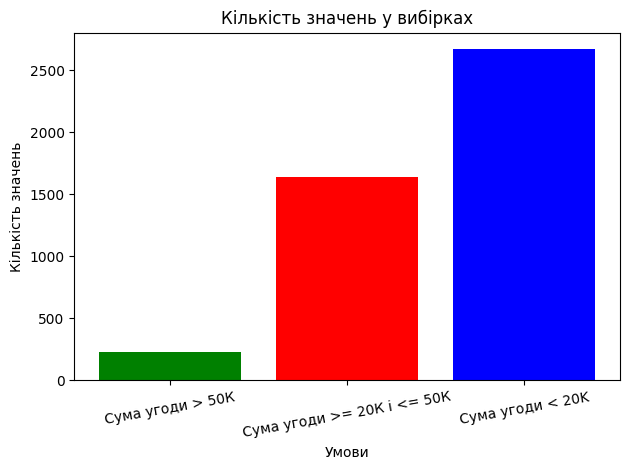

In [22]:
is_valid_unique_df_dt1 = all(unique_df_dt1.loc[df['amountbegingroup'] > 0, 'deal_target'] == 1)
# перевіряємо дані на валідність, щоб для значень в полі amountbegingroup більше 0 було deal_target = 1, що означає, що угода була оформлена на певну суму

if is_valid_unique_df_dt1:
# Аналізуємо, яка к-сть угод є в залежності від суми 
    series_AB_group = pd.Series(unique_df_dt1['amountbegingroup'].values, index=unique_df_dt1['id'])

    bins = [1, 2, 3, 4]
    hist, _ = np.histogram(series_AB_group.to_numpy() , bins=bins)

    # 1 - угода оформлена на більше 50 тис грн, 2 - від 20тис до 50тис, 3 - менше 20тис
    labels=[
        'Сума угоди > 50К',
        'Сума угоди >= 20К і <= 50К',
        'Сума угоди < 20K'
    ]

    temp_df = pd.DataFrame(hist, index=labels, columns=['К-сть угод в групі']).transpose()
    print(temp_df)

    # Створення стовпчикової діаграми
    plt.bar(labels, hist, color=['green', 'red', 'blue'])
    plt.title('Кількість значень у вибірках')
    plt.xlabel('Умови')
    plt.ylabel('Кількість значень')
    plt.xticks(rotation=10)
    plt.tight_layout()  # Покращує розташування елементів
    plt.show()
else:
    print('Помилка в даних!!!')



{1: np.int64(41), 2: np.int64(247), 3: np.int64(358)}


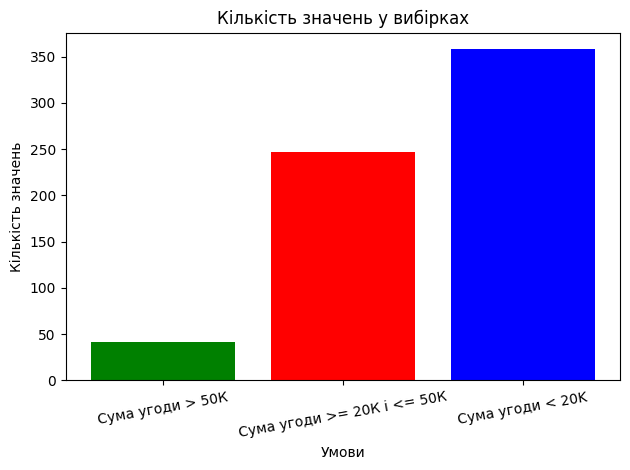

In [23]:
#CredHist_count_PIL_loans_close_1m    Общее количество закрытых кредитов типа PIL
# визначаємо у якої категорії клієнтів по сумі оформленого PIL найбільша к-сть закритих кредитів
my_dict = {
    1 : 0,
    2 : 0,
    3 : 0
}

for key in my_dict.keys():
    my_dict[key] = unique_df_dt1[unique_df_dt1['amountbegingroup'] == key]['CredHist_count_PIL_loans_close_1m'].sum()

print(my_dict)

# Створення стовпчикової діаграми
plt.bar(labels,  my_dict.values(), color=['green', 'red', 'blue'])
plt.title('Кількість значень у вибірках')
plt.xlabel('Умови')
plt.ylabel('Кількість значень')
plt.xticks(rotation=10)
plt.tight_layout()  # Покращує розташування елементів
plt.show()

# Можна зробити висновок, що найбільше закритих кредитів у клієнтів, які оформили кредит на суму до 20К
